In [6]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# Brownian Motion and Random Walks
Alex Gorodetsky, September 2020

As we study inference and estimation in dynamical systems, Brownian motion will arise. It serves as the standard model for representing uncertainty in differential equations and leads to the concept of stochastic differential equations. These equations are then the basis for all filtering approaches (Kalman, Particle, and otherwise). 

Here we introduce Brownian motion as the *limit of a set of random walks.* We make this introduction because it allows us to use the central limit theorem to discuss the properties of Brownian motion


## Random Walks

Lets recall a random walk where by we take steps $X_1, X_2, \ldots, X_n$ where each step is a bounded random variable with mean zero and variance 1. As an example $X_i = \pm 1$ with probability $1/2$ each.

In [8]:
def generate_random_walk_steps(num_steps):
    """ Generate a set of steps for a random walk"""
    X = np.random.rand(num_steps) # samples from a uniform
    # Inverse CDF Trick
    X[X > 0.5] = 1.0
    X[X < 0.5] = -1.0
    return X

Lets now define a new variable $Y_{\frac{i}{n}}^{(n)} = \frac{1}{\sqrt{n}}\left(X_1 + \ldots + X_i\right)$, with $Y_{0}^{(n)} = 0.$ This variable is almost the average used in Monte Carlo, but not quite. It has a denominator that uses the square root of the number of steps. This variable can be viewed as 
\begin{equation}
Y_{\frac{i+1}{n}}^{(n)} = Y_{\frac{i}{n}}^{(n)} + \frac{1}{\sqrt{n}} X_{i+1}, \quad i=0,1,2,\ldots
\end{equation}
This variable is like the random walk in your projects, except that time is "sped up" by a factor of $n$ and space is shrunk by a factor of $\sqrt{n}.$ 

In [7]:
def generate_random_walk(steps, n):
    """Generate a random walk that is shrunk in space and sped up in time from a sequence of steps"""
    
    Y = np.concatenate((np.array([0]), np.cumsum(steps)/np.sqrt(n)))
    return Y

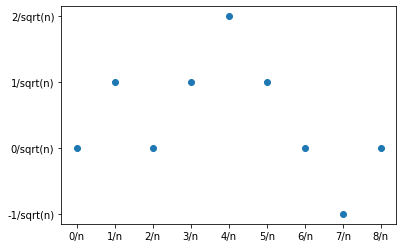

In [9]:
nsteps = 8
np.random.seed(10) # fix seed for reproducibility
step_index = np.arange(0, nsteps+1, 1)
n = 10
Y = generate_random_walk(generate_random_walk_steps(nsteps), n)

ymin = int(np.min(Y) * np.sqrt(n))
ymax = int(np.max(Y) * np.sqrt(n))
ytics = np.arange(ymin, ymax+1, 1)
ytic_labels = ["{0}/sqrt(n)".format(ii) for ii in range(ymin, ymax+1)]
plt.figure()
plt.xticks(step_index, ["{0}/n".format(i) for i in range(0, nsteps+1)])
plt.yticks(ytics/np.sqrt(n), ytic_labels)
plt.plot(step_index, Y, 'o')
plt.show()

Now we can interpolate these points to form a *continuous time* process $\bar{Y}_{t}^{(n)}$.

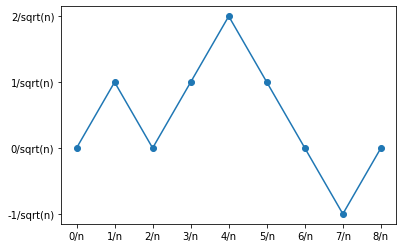

In [10]:
plt.figure()
plt.xticks(step_index, ["{0}/n".format(i) for i in range(0, nsteps+1)])
plt.yticks(ytics/np.sqrt(n), ytic_labels)
plt.plot(step_index, Y, '-o')
plt.show()

This process agrees with the discrete random walk at times $t = \frac{i}{n}$, and in between it is always within $\frac{1}{\sqrt{n}}.$ 

Now that we have defined a continuous-time random walk we can obtain its values for different values of $n$
\begin{equation}
\bar{Y}_{t}^{n} \approx Y_{\frac{\left \lfloor{tn}\right \rfloor}{n} }^{(n)} = \frac{1}{\sqrt{n}}\left(X_{1} + \ldots + X_{\left \lfloor{tn}\right \rfloor}\right)
\end{equation}

The larger the $n$, the more steps occur within a given time period

Lets plot the results for different values of $n$ for $t \in [0, 5].$

Text(0.5, 1.0, 'n=100')

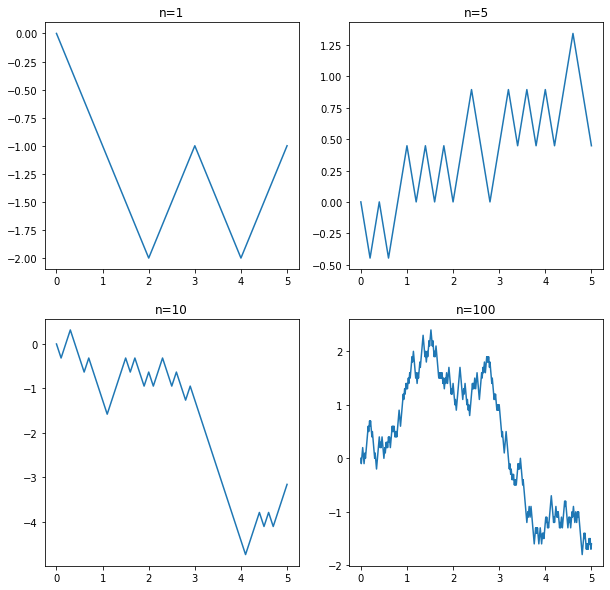

In [13]:
figs, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
t = 5

n = 1
nsteps = t * n
tplot = np.linspace(0, t, nsteps+1)
axs[0, 0].plot(tplot, generate_random_walk(generate_random_walk_steps(nsteps), n))
axs[0, 0].set_title("n=1")

n = 5
nsteps = t * n
tplot = np.linspace(0, t, nsteps+1)
axs[0, 1].plot(tplot, generate_random_walk(generate_random_walk_steps(nsteps), n))
axs[0, 1].set_title("n=5")

n = 10
nsteps = t * n
tplot = np.linspace(0, t, nsteps+1)
axs[1, 0].plot(tplot, generate_random_walk(generate_random_walk_steps(nsteps), n))
axs[1, 0].set_title("n=10")

n = 100
nsteps = t * n
tplot = np.linspace(0, t, nsteps+1)
axs[1, 1].plot(tplot, generate_random_walk(generate_random_walk_steps(nsteps), n))
axs[1, 1].set_title("n=100")

## Statistical properties as n goes to infinity

This result becomes more accurate as $n\to \infty$. We can also ask what happens to the process when $n\to \infty$? For this we can use the CLT:
1. Expected value: $\lim_{n\to\infty} \mathbb{E}\left[\bar{Y}_{t}^{n}\right] = \lim_{n \to \infty} \mathbb{E}\left[Y_{\frac{\left \lfloor{tn}\right \rfloor}{n} }^{(n)}\right] = \lim_{n\to\infty} \mathbb{E}\left[\frac{1}{\sqrt{n}}\left(X_{1} + \ldots + X_{\left \lfloor{tn}\right \rfloor}\right)\right] = \lim_{n\to\infty} \frac{1}{\sqrt{n}} \left \lfloor{tn}\right \rfloor \mathbb{E}\left[X\right] = 0$
2. Variance: $\lim_{n\to\infty} \mathbb{V}ar\left[\bar{Y}_{t}^{n}\right] = \lim_{n \to \infty} \mathbb{V}ar\left[Y_{\frac{\left \lfloor{tn}\right \rfloor}{n} }^{(n)}\right] = \lim_{n\to\infty} \mathbb{V}ar\left[\frac{1}{\sqrt{n}}\left(X_{1} + \ldots + X_{\left \lfloor{tn}\right \rfloor}\right)\right] = \lim_{n\to\infty} \frac{1}{n}\left \lfloor{tn}\right \rfloor \mathbb{V}ar\left[X\right] = t$

To summarize, the limit of this random variable is one way to describe a so called Brownian Motion: $$W_t = \lim_{n\to \infty} \bar{Y}_{t}^n.$$ In addition to the above two properties we further have 
3. *normally distributed:* $W_t \sim \mathcal{N}(0, t)$ 
4. *covariance structure:* $\mathbb{E}\left[W_t  W_s\right] = \min(s, t)$
5. *independent normal increments:* $W_{t_2} - W_{t_1}$ is distributed according to a normal $\mathcal{N}(0, t_2-t_1)$ and $W_{t_4} - W_{t_3}$ is independent of $W_{t_2} - W_{t_1}$ whenever the time increments don't intersect ($0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$)
5. $W_t$ has continuous paths (as a function of $t$) with probability 1.